In [1]:
# -----------------------------------------------------------
# HEART DISEASE PREDICTION USING ANN (Deep Learning)
# -----------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
df = pd.read_csv(r"C:\Users\kamir\slk projects\Artificial Neural Network (ANN)\heart_cleveland_upload-checkpoint.csv")

print("Dataset Loaded Successfully!")
df.head()


Dataset Loaded Successfully!


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [4]:
for col in ["id", "dataset"]:
    if col in df.columns:
        df = df.drop(col, axis=1)


In [5]:
df = df.fillna(df.median(numeric_only=True))


In [6]:
X = df.drop("condition", axis=1)
y = df["condition"]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)


In [8]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:

Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],))



<Dense name=dense_3, built=False>

In [14]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [17]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.2)



Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5661 - loss: 0.6967 - val_accuracy: 0.5208 - val_loss: 0.6833
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5926 - loss: 0.6700 - val_accuracy: 0.6042 - val_loss: 0.6646
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6614 - loss: 0.6464 - val_accuracy: 0.7292 - val_loss: 0.6480
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7037 - loss: 0.6238 - val_accuracy: 0.7500 - val_loss: 0.6332
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7407 - loss: 0.6037 - val_accuracy: 0.7500 - val_loss: 0.6189
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7778 - loss: 0.5816 - val_accuracy: 0.7708 - val_loss: 0.6038
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7937 - loss: 0.5592 - val_accuracy: 0.6875 - val_loss: 0.5886
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8148 - loss: 0.5380 - val_accuracy: 0.6875 - v

In [18]:
loss, acc = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", acc)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7833 - loss: 0.5927 
Test Accuracy: 0.7833333611488342


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


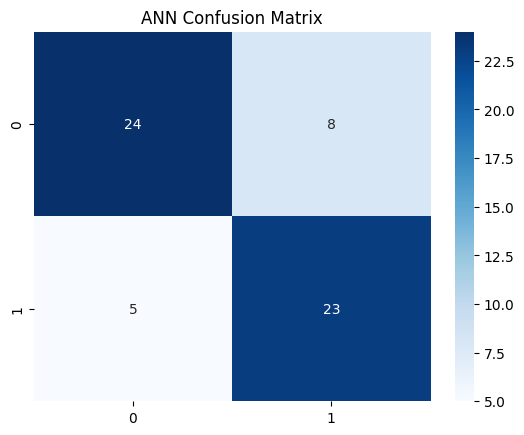

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       0.74      0.82      0.78        28

    accuracy                           0.78        60
   macro avg       0.78      0.79      0.78        60
weighted avg       0.79      0.78      0.78        60



In [19]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("ANN Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))


In [20]:
sample = {
    "age": 55,
    "sex": 1,
    "cp": 0,
    "trestbps": 130,
    "chol": 250,
    "fbs": 0,
    "restecg": 1,
    "thalach": 150,  # Correct spelling
    "exang": 0,
    "oldpeak": 1.2,
    "slope": 2,
    "ca": 0,
    "thal": 2
}

sample_df = pd.DataFrame([sample])
sample_scaled = scaler.transform(sample_df)

result = (model.predict(sample_scaled) > 0.5).astype(int)[0][0]

print("Prediction:", "Heart Disease (1)" if result == 1 else "No Heart Disease (0)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Prediction: Heart Disease (1)
